# Normalização das funções principais

## Funções principais

- São usadas na construção das expansões multidimensionais tensorias
- Definidas em K&S, página 101
- Deve-se ter em mente que, dada a tensorização, as integrais em geral resumem-se a integrais 1D (Teorema de Fubini); portanto podemos normalizar cada uma das funções de forma independente.

### Definição *sem* normalização
$$
\tilde{\psi}_p^a(x) = P_p^{0,0}(x), \quad \tilde{\psi}_{pq}^b(x) = \biggl(\frac{1-x}{2}\biggr)^p P_q^{2p+1,0}(x), \quad \tilde{\psi}_{pqr}^c(x) = \biggl(\frac{1-x}{2}\biggr)^{p+q} P_q^{2p+2q+2,0}(x)
$$

### Ortogonalidade

Denotando $P_p^{\alpha,\beta}(x)$ o polinômio de Jacobi de ordem $p$, com pesos $\alpha$ e $\beta$, temos a seguinte relação de ortogonalidade (K&S, p. 586):

$$
\int_{-1}^1 (1-x)^{\alpha} (1+x)^{\beta} P_m^{\alpha,\beta}(x) P_n^{\alpha,\beta}(x)\,dx =
\begin{cases}
\dfrac{2^{\alpha+\beta+1}}{2n+\alpha+\beta+1} \dfrac{\Gamma(n+\alpha+1)\Gamma(n+\beta+1)}{n! \Gamma(n+\alpha+\beta+1)} & m = n \\
0 & m \neq n
\end{cases}
$$

### Transformação de colapso (K&S, p. 101)

Tomando $\xi_{1,2}$ as coordenadas no triângulo padrão e $\eta_{1,2}$ as coordenadas no quadrilátero padrão, temos:

$$
\eta_1 = \frac{2(1+\xi_1)}{1-\xi_2}-1, \quad \eta_2 = \xi_2.
$$

Devemos lembrar que necessitamos da *transformação inversa* desta pois desejamos escrever a integral do triângulo em função do quadrado.

In [1]:
import sympy as sp
sp.init_printing(use_latex=True)

In [9]:
q1, q2, q3, e1, e2, e3 = sp.var('q1 q2 q3 e1 e2 e3')

In [10]:
Qsi = sp.Matrix([q1, q2])
Eta = sp.Matrix([2*(1+q1)/(1-q2), q2])

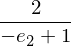

In [11]:
Eta.jacobian(Qsi).det().subs(q2, e2)

Portanto,
$$
J = \frac{\partial(\xi_1,\xi_2)}{\partial(\eta_1,\eta_2)} = \frac{1-\eta_2}{2}
$$

## Normalização

### Primeira função principal, $\tilde{\psi}_p^a(x)$

Usando a relação de ortogonalidade, temos:

$$
\int_{-1}^1 \tilde{\psi}_p^a(x) \tilde{\psi}_p^a(x)\,dx =
\int_{-1}^1 (1-x)^{0} (1+x)^{0} P_p^{0,0}(x) P_p^{0,0}(x)\,dx =
\dfrac{2^{1}}{2p+1} \dfrac{\Gamma(p+1)\Gamma(p+1)}{p! \Gamma(p+1)} =
\frac{2}{2p+1}.
$$

Desta forma o termo de normalização da primeira função principal é:

$$
\sqrt{\frac{2p+1}{2}}
$$

### Segunda função principal, $\tilde{\psi}_{pq}^b(x)$

Lembrando que a função de base no triângulo será $\phi_{pq}(\xi_1,\xi_2) = \tilde{\psi}_p^a(\xi_1)\tilde{\psi}_{pq}^b(\xi_2)$, temos:

$$
\int_{-1}^1 \int_{-1}^{-\xi_2} \phi_{pq}(\xi_1)\phi_{pq}(\xi_2)\, d\xi_2 d\xi_1 =
\int_{-1}^1 \int_{-1}^{-\xi_2} \bigl(\tilde{\psi}_p^a(\xi_1)\bigr)^2 \bigl(\tilde{\psi}_{pq}^b(\xi_2)\bigr)^2\,d\xi_2d\xi_1
$$

Usando a transformação de colapso, podemos escrever:

$$
= \int_{-1}^1 \bigl(\tilde{\psi}_p^a(\eta_1)\bigr)^2 d\eta_1 \int_{-1}^1 \bigl(\tilde{\psi}_{pq}^b(\eta_2)\bigr)^2\frac{1-\eta_2}{2} \,d\eta_2
$$

A primeira integral já foi vista anteriormente. A segunda reduz-se a:

$$
\int_{-1}^1 \bigl(\tilde{\psi}_{pq}^b(\eta_2)\bigr)^2\frac{1-\eta_2}{2} \,d\eta_2 =
\biggl(\frac{1-\eta_2}{2}\biggr)^p P_q^{2p+1,0}(\eta_2) \biggl(\frac{1-\eta_2}{2}\biggr)^p P_q^{2p+1,0}(\eta_2) \frac{1-\eta_2}{2}\,d\eta_2 =
$$

$$
\int_{-1}^1 \biggl(\frac{1-\eta_2}{2}\biggr)^{2p+1} \bigl(P_q^{2p+1,0}(\eta_2)\bigr)^2\,d\eta_2 =
\dfrac{1}{2^{2p+1}}\dfrac{2^{2p+1}}{p+q+1} \dfrac{\Gamma(2p+q+2)\Gamma(q+1)}{q! \Gamma(2p+q+2)} = \dfrac{1}{p+q+1}.
$$

Desta forma o termo de normalização reduz-se a:

$$
\sqrt{p+q+1}.
$$

### Terceira função principal, $\tilde{\psi}_{pqr}^c(x)$

Seguindo um argumento totalmente análogo, mas para o tetraedro, e lembrando que nesse caso o Jacobiano da transformação de colapso é (veja abaixo):

$$
\frac{\partial(\xi_1,\xi_2,\xi_3)}{\partial(\eta_1,\eta_2,\eta_3)} =
\frac{1-\eta_2}{2}\biggl(\frac{1-\eta_3}{2}\biggr)^2
$$

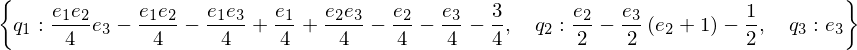

In [28]:
# Qsi em função de Eta
Eta = sp.Matrix([e1, e2, e3])
inversa = sp.solve(Eta-sp.Matrix([2*(1+q1)/(-q2-q3)-1, 2*(1+q2)/(1-q3)-1, q3]), [q1, q2, q3])
inversa

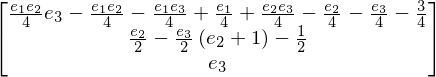

In [29]:
Qsi = sp.Matrix([inversa[q1], inversa[q2], inversa[q3]])
Qsi

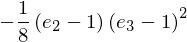

In [35]:
sp.factor(Qsi.jacobian(Eta).det())

Já aplicando a transformação na última integral em $\eta_3$, chegamos a:

$$
\int_{-1}^1 P_r^{2p+2q+2,0}(\eta_3) P_r^{2p+2q+2,0}(\eta_3)\biggl(\frac{1-\eta_3}{2}\biggr)^{2p+2q+2}\,d\eta_3 =
\frac{1}{r+p+q+\frac{3}{2}},
$$
donde chegamos no fator de normalização:
$$
\sqrt{r+p+q+\frac{3}{2}}.
$$